# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Understanding the data

In [57]:
data = pd.read_csv("PCOS_data.csv")
df = data.copy()
print(df.shape)
df.head()

(541, 45)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# EDA

In [73]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,270.862709,270.862709,0.326531,31.430427,59.637291,156.471792,24.311688,13.801484,73.252319,19.237477,...,0.491651,0.515770,0.246753,114.641929,76.935065,6.116883,6.643785,15.018182,15.449666,8.472115
std,156.320611,156.320611,0.469380,5.414105,11.041874,6.039703,4.060444,1.843182,4.437858,1.687260,...,0.500395,0.500215,0.431522,7.391079,5.574892,4.223240,4.444538,3.565130,3.319807,2.166571
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.500000,135.500000,0.000000,28.000000,52.000000,152.000000,21.650000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,405.500000,405.500000,1.000000,35.000000,65.000000,160.000000,26.650000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


## Handling NA values

In [60]:
# Unnamed column contains all NA values, which is not useful
df.drop(columns = ['Unnamed: 44'],axis=1,inplace=True)

In [61]:
df.isna().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [63]:
# Removes rows that contain NA values
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.isna().sum().sum())

0


## Distribution of Dataset

In [66]:
# Separate categorical and numerical columns
categorical_cols = ['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)',
                    'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
                    'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'PCOS (Y/N)']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

print(categorical_cols)
print(numerical_cols)


['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'PCOS (Y/N)']
['Sl. No', 'Patient File No.', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


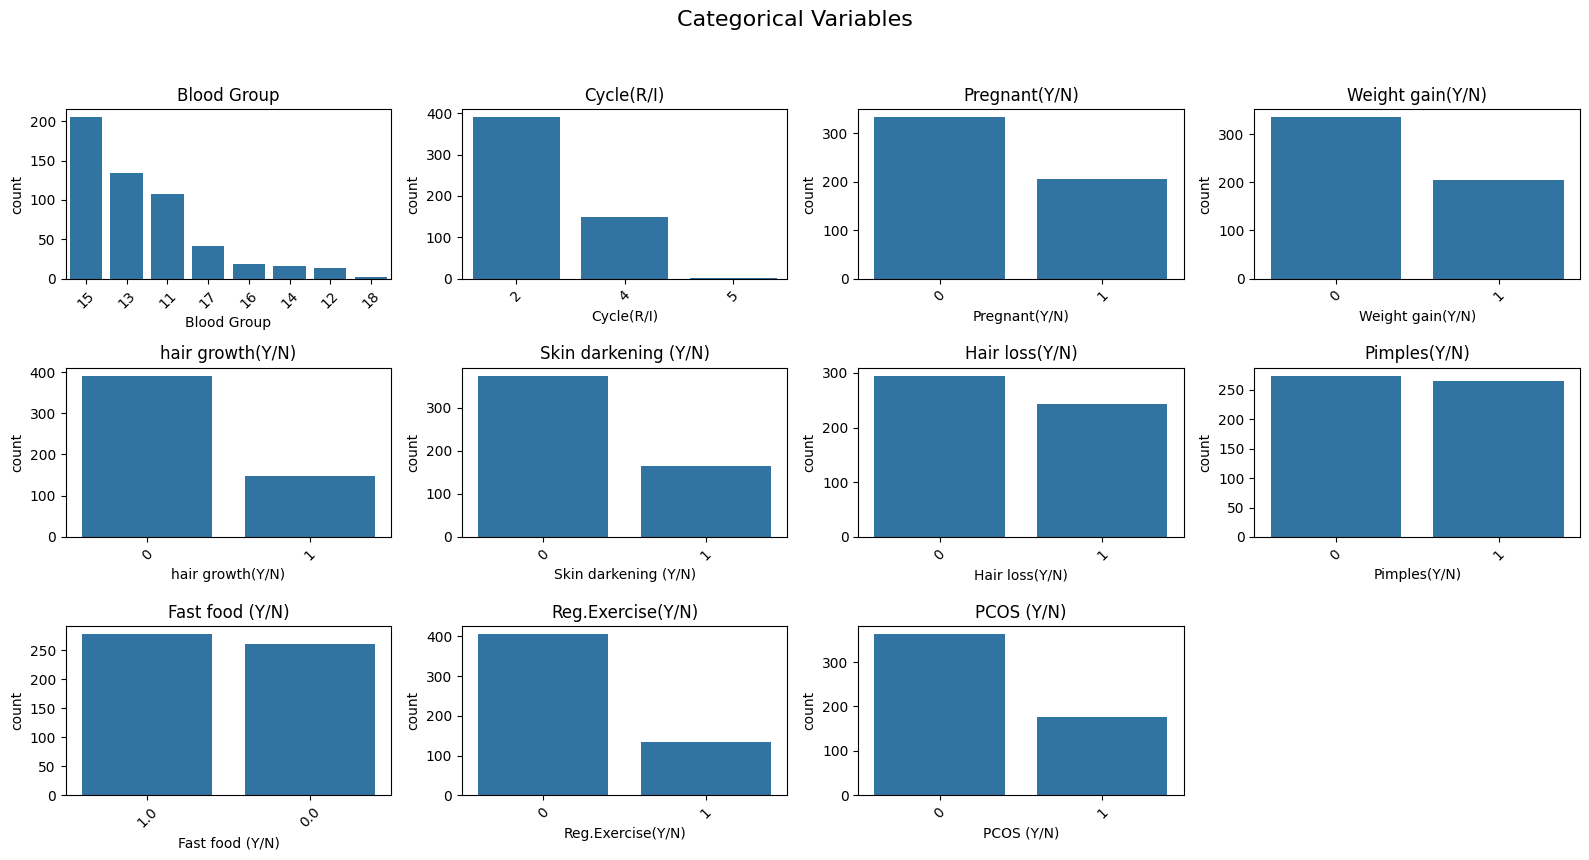

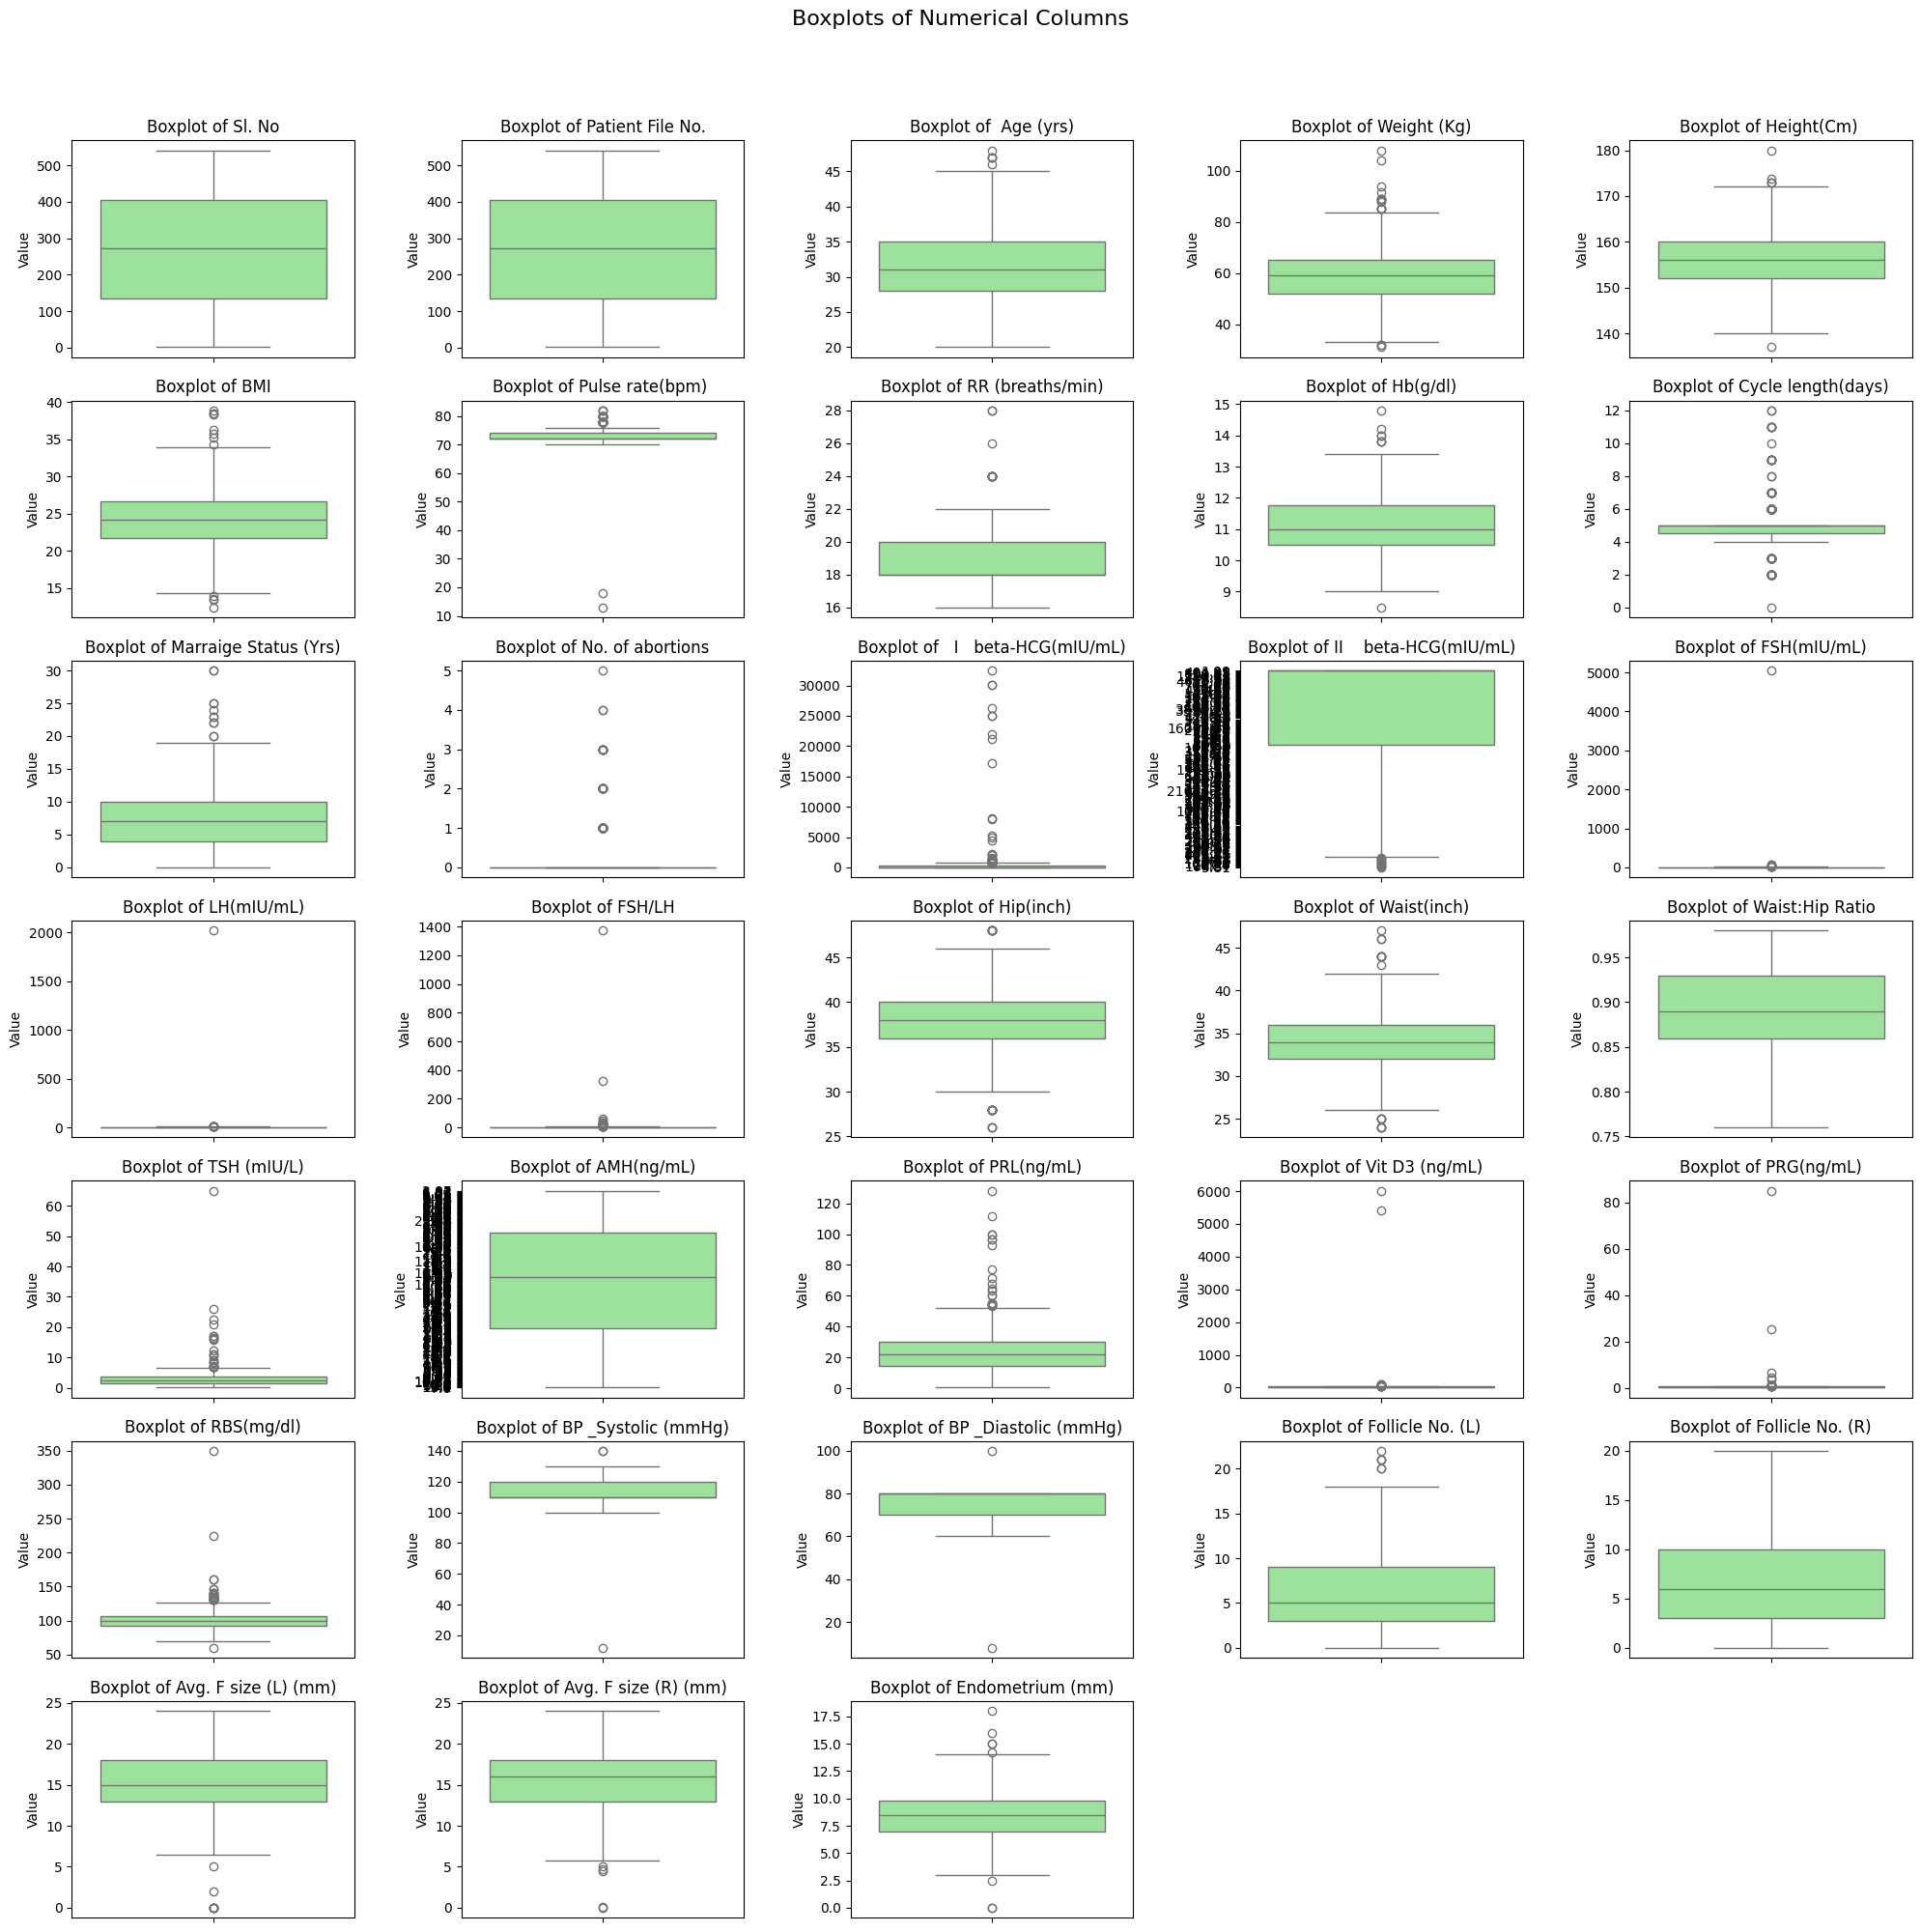

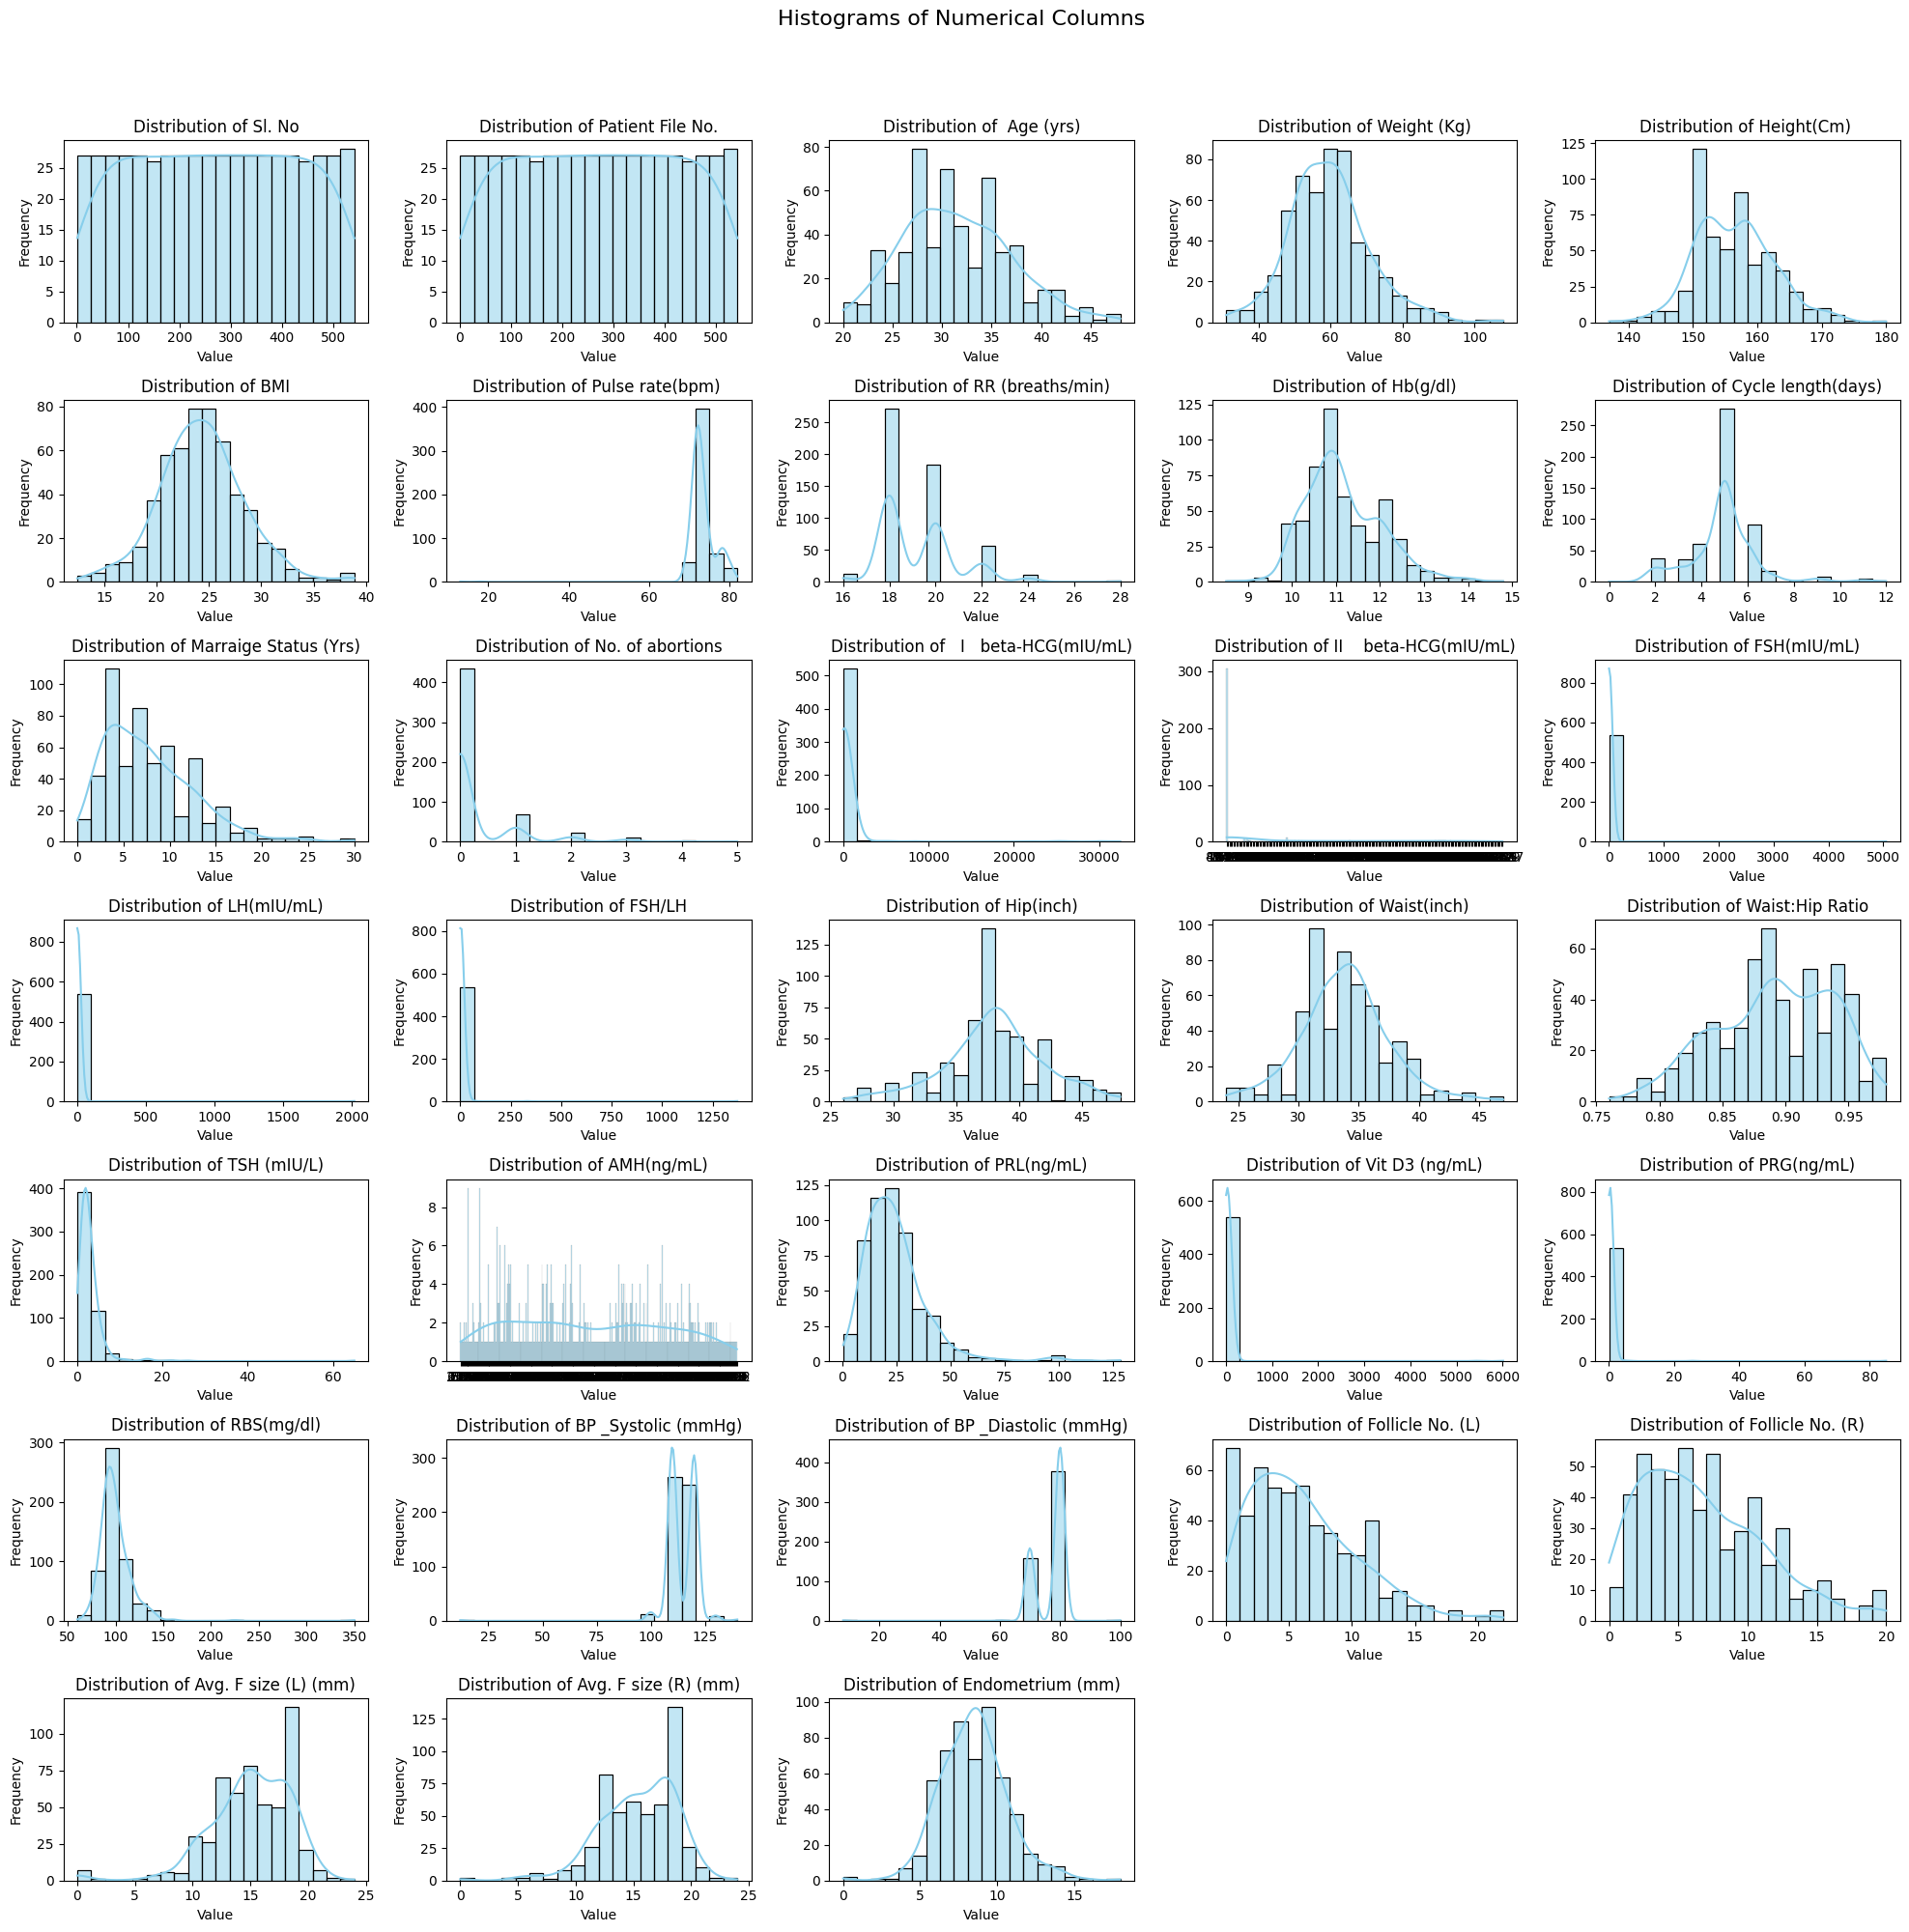

In [74]:
# Function to plot subplots for categorical columns
def plot_categorical_subplots(df, cat_cols, rows=3, cols=4):
    total = len(cat_cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', labelrotation=45)

    # Hide unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Categorical Variables", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to plot subplots for numerical columns (boxplot)
def plot_numerical_boxplots(df, num_cols, rows=7, cols=5):
    total = len(num_cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Value")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Boxplots of Numerical Columns", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to plot subplots for numerical columns (histogram)
def plot_numerical_histograms(df, num_cols, rows=7, cols=5, bins=20):
    total = len(num_cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, ax=axes[i], bins=bins, kde=True, color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Histograms of Numerical Columns", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the functions
plot_categorical_subplots(df, categorical_cols, rows=3, cols=4)
plot_numerical_boxplots(df, numerical_cols, rows=7, cols=5)
plot_numerical_histograms(df, numerical_cols, rows=7, cols=5)

# Handling duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

# Handling columns with wrong types

In [ ]:
# find which columns do not contain numeric values (should be all numeric)
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Unnamed: 44']


In [ ]:
non_numeric_values = df[pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce').isna() & df['II    beta-HCG(mIU/mL)'].notna()]['II    beta-HCG(mIU/mL)']

print("Non-numeric values in column:", non_numeric_values.tolist())

Non-numeric values in column: ['1.99.']


In [ ]:
non_numeric_values = df[pd.to_numeric(df['AMH(ng/mL)'], errors='coerce').isna() & df['AMH(ng/mL)'].notna()]['AMH(ng/mL)']

print("Non-numeric values in column:", non_numeric_values.tolist())

Non-numeric values in column: ['a']


In [ ]:
# change the values to numeric
#1.99. high likely is a typo (extra .), so we remove the '.'
df.loc[df['II    beta-HCG(mIU/mL)'] == '1.99.', 'II    beta-HCG(mIU/mL)'] = 1.99

# 'a' does not make sense here, so we change it to NaN
df.loc[df['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number'])

# Check for non-numeric values
for col in non_numeric_cols.columns:
    non_numeric_rows = non_numeric_cols[non_numeric_cols[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
    if not non_numeric_rows.empty:
        print(f"Column '{col}' contains non-numeric values:\n{non_numeric_rows}\n")

Column 'AMH(ng/mL)' contains non-numeric values:
    II    beta-HCG(mIU/mL) AMH(ng/mL) Unnamed: 44
305                   1.99        NaN         NaN

Column 'Unnamed: 44' contains non-numeric values:
    II    beta-HCG(mIU/mL) AMH(ng/mL) Unnamed: 44
0                     1.99       2.07         NaN
1                     1.99       1.53         NaN
2                   494.08       6.63         NaN
3                     1.99       1.22         NaN
4                   801.45       2.26         NaN
..                     ...        ...         ...
536                   1.99        1.7         NaN
537                   1.99        5.6         NaN
538                   1.99        3.7         NaN
539                   1.99        5.2         NaN
540                   1.99         20         NaN

[540 rows x 3 columns]



In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df.select_dtypes(exclude=[np.number]).columns)

Index([], dtype='object')


# Handling inconsistencies

In [ ]:
df["Cycle(R/I)"].value_counts()

Cycle(R/I)
2    390
4    150
5      1
Name: count, dtype: int64

In [ ]:
# Removes '5' from the "Menstrual Cycle (R/I)" column
df = df[df["Cycle(R/I)"]!=5]

# Removing non-useful and highly correlated columns

In [ ]:
#S1. No and Patient File No. are both just numbering the patients, hence will not provide any useful information

df.drop(columns = ['Sl. No','Patient File No.','Unnamed: 44'],axis=1,inplace=True)

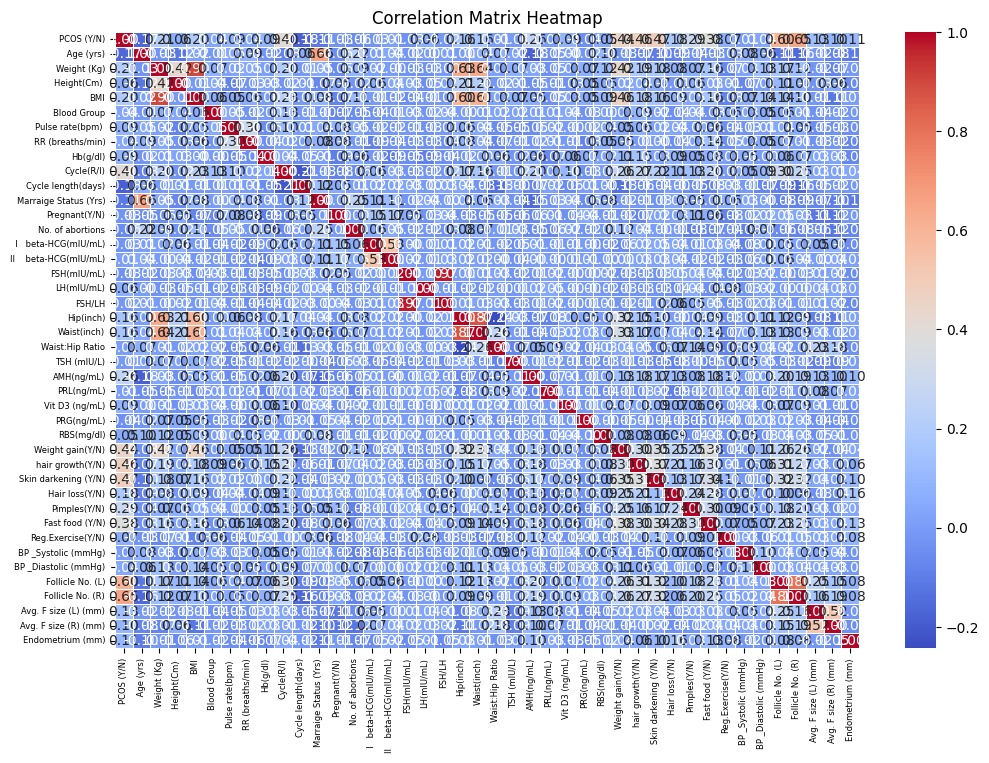

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adjust axis label font size
plt.xticks(fontsize=6, rotation=90)  # X-axis label size
plt.yticks(fontsize=6)  # Y-axis label size
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#BMI is derived from height and weight, hence will be highly correlated
#Waist:Hip Ratio is derived from hip and waist, hence will be highly correlated
#FSH/LH is derived from LH(mIU/mL) and FSH(mIU/mL), hence will be highly correlated
#Marriage Status correlated with Age

#Hip and Waist correlated with BMI/weight as well
#I   beta-HCG(mIU/mL) and II   beta-HCG(mIU/mL) correlated, can check the meaning of both terms
#FSH/LH and FSH(mIU/mL) highly correlated, may be same thing
#weight gain and weight/bmi correlated
#Follicle No. (L) and (R) highly correlated
#Avg. F size (L) and (R) correlated

df.drop(columns = ['Weight (Kg)','Height(Cm) ','Hip(inch)', 'Waist(inch)', 'LH(mIU/mL)', 'FSH(mIU/mL)'],axis=1,inplace=True)

In [ ]:
print(df.columns)

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


# Renaming columns

In [ ]:
# Remove space in column names using strip() function
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


In [ ]:
# Correct spelling errors and make the column names clearer
d={"Marraige Status (Yrs)":"Marriage Status (Yrs)", "Cycle(R/I)":"Menstrual Cycle(R/I)", 
   "Cycle length(days)": "Menstrual Cycle Length(days)"}
df.rename(columns=d, inplace=True)
print(df.columns)

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Menstrual Cycle(R/I)',
       'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


# Handling outliers

In [ ]:
# Pulse rate(bpm)
df[(df["Pulse rate(bpm)"]<60)|(df["Pulse rate(bpm)"]>100)]

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
222,0,30,21.7,11,18,20,12.0,2,5,5.0,...,0,1.0,1,120,70,4,3,14.0,18.0,8.7
295,0,31,20.8,15,13,18,11.0,2,4,12.0,...,1,0.0,0,110,70,8,5,17.0,15.0,8.5


In [ ]:
# FSH(mIU/mL) normal range is between 4.7 and 21.5 mIU/mL
# df[df['FSH(mIU/mL)']==5052]

In [ ]:
# Value is too high
# df[df["LH(mIU/mL)"]==2018]

In [ ]:
# Removed those patients who have super low pulse rates
df = df[(df["Pulse rate(bpm)"]>=60) & (df["Pulse rate(bpm)"]<=100)]

# Removed the patient with super high FSH(mIU/mL)
# df = df[df['FSH(mIU/mL)']!=5052]

# Removed the patient with super high LH(mIU/mL)
# df = df[df["LH(mIU/mL)"]!=2018]

In [ ]:
# AMH(ng/mL)
df = df[df["AMH(ng/mL)"] != 66]

# Vit D3 (ng/mL)
df = df[df["Vit D3 (ng/mL)"] != 0]
df = df[df["Vit D3 (ng/mL)"] <= 1000]

In [ ]:
df = df[(df["BP _Systolic (mmHg)"]>=30)]
df = df[(df["BP _Diastolic (mmHg)"]>=30)]

In [ ]:
df.reset_index(drop=True, inplace=True)

# Changing the integers in categorical columns to strings, before one-hot encoding

In [ ]:
# Blood Group
d={11: "A+", 12: "A-", 13: "B+", 14: "B-", 15: "O+", 16:"O-", 17: "AB+", 18: "AB-"}
df["Blood Group"] = df["Blood Group"].replace(to_replace=d)
df["Blood Group"].value_counts()

Blood Group
O+     202
B+     130
A+     106
AB+     41
O-      19
B-      16
A-      13
AB-      2
Name: count, dtype: int64

In [ ]:
# Menstrual Cycle(R/I)
d={4: "irregular", 2: "regular"}
df["Menstrual Cycle(R/I)"] = df["Menstrual Cycle(R/I)"].replace(to_replace=d)
df["Menstrual Cycle(R/I)"].value_counts()

Menstrual Cycle(R/I)
regular      383
irregular    146
Name: count, dtype: int64

# Saving the csv file for TabTransformers code

In [ ]:
df.to_csv("./tt_data/tabtransformer_input.csv", header=True, index=False)

# Reading tabtransformers_input.csv

In [ ]:
data = pd.read_csv("./tt_data/tabtransformer_input.csv")
df = data.copy()
df

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,19.3,O+,78,22,10.48,regular,5,7.0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,24.9,O+,74,20,11.70,regular,5,11.0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,25.3,A+,72,18,11.80,regular,5,10.0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,29.7,B+,72,20,12.00,regular,5,4.0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,20.1,A+,72,18,10.00,regular,5,1.0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,35,18.5,AB+,72,16,11.00,regular,5,8.0,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
525,0,30,25.3,O+,72,18,10.80,regular,5,4.0,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
526,0,36,23.4,B+,74,20,10.80,regular,6,8.0,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
527,0,27,22.2,O+,74,20,12.00,irregular,2,2.0,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


# One-Hot Encoding of categorical columns

In [ ]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['Blood Group', 'Menstrual Cycle(R/I)']


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
df= pd.concat([df.drop(cat_cols, axis=1), one_hot_df], axis=1)
df.head()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0,28,19.3,78,22,10.48,5,7.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,36,24.9,74,20,11.70,5,11.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,33,25.3,72,18,11.80,5,10.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,37,29.7,72,20,12.00,5,4.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,25,20.1,72,18,10.00,5,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isna().sum()

PCOS (Y/N)                        0
Age (yrs)                         0
BMI                               0
Pulse rate(bpm)                   0
RR (breaths/min)                  0
Hb(g/dl)                          0
Menstrual Cycle Length(days)      0
Marriage Status (Yrs)             0
Pregnant(Y/N)                     0
No. of abortions                  0
I   beta-HCG(mIU/mL)              0
II    beta-HCG(mIU/mL)            0
FSH/LH                            0
Waist:Hip Ratio                   0
TSH (mIU/L)                       0
AMH(ng/mL)                        0
PRL(ng/mL)                        0
Vit D3 (ng/mL)                    0
PRG(ng/mL)                        0
RBS(mg/dl)                        0
Weight gain(Y/N)                  0
hair growth(Y/N)                  0
Skin darkening (Y/N)              0
Hair loss(Y/N)                    0
Pimples(Y/N)                      0
Fast food (Y/N)                   0
Reg.Exercise(Y/N)                 0
BP _Systolic (mmHg)         

# Saving the csv file

In [ ]:
df.to_csv("cleaned_data.csv", header=True, index=False)

# Reading cleaned_data.csv

In [ ]:
data = pd.read_csv("cleaned_data.csv")
df = data.copy()

# EDA

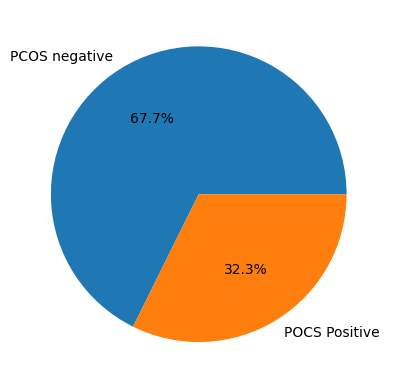

In [ ]:
# PCOS (Y/N) Distribution
s = df["PCOS (Y/N)"].map({1: "POCS Positive", 0: "PCOS negative"}).value_counts()
plt.pie(s, labels=s.index, autopct='%1.1f%%')
plt.show()

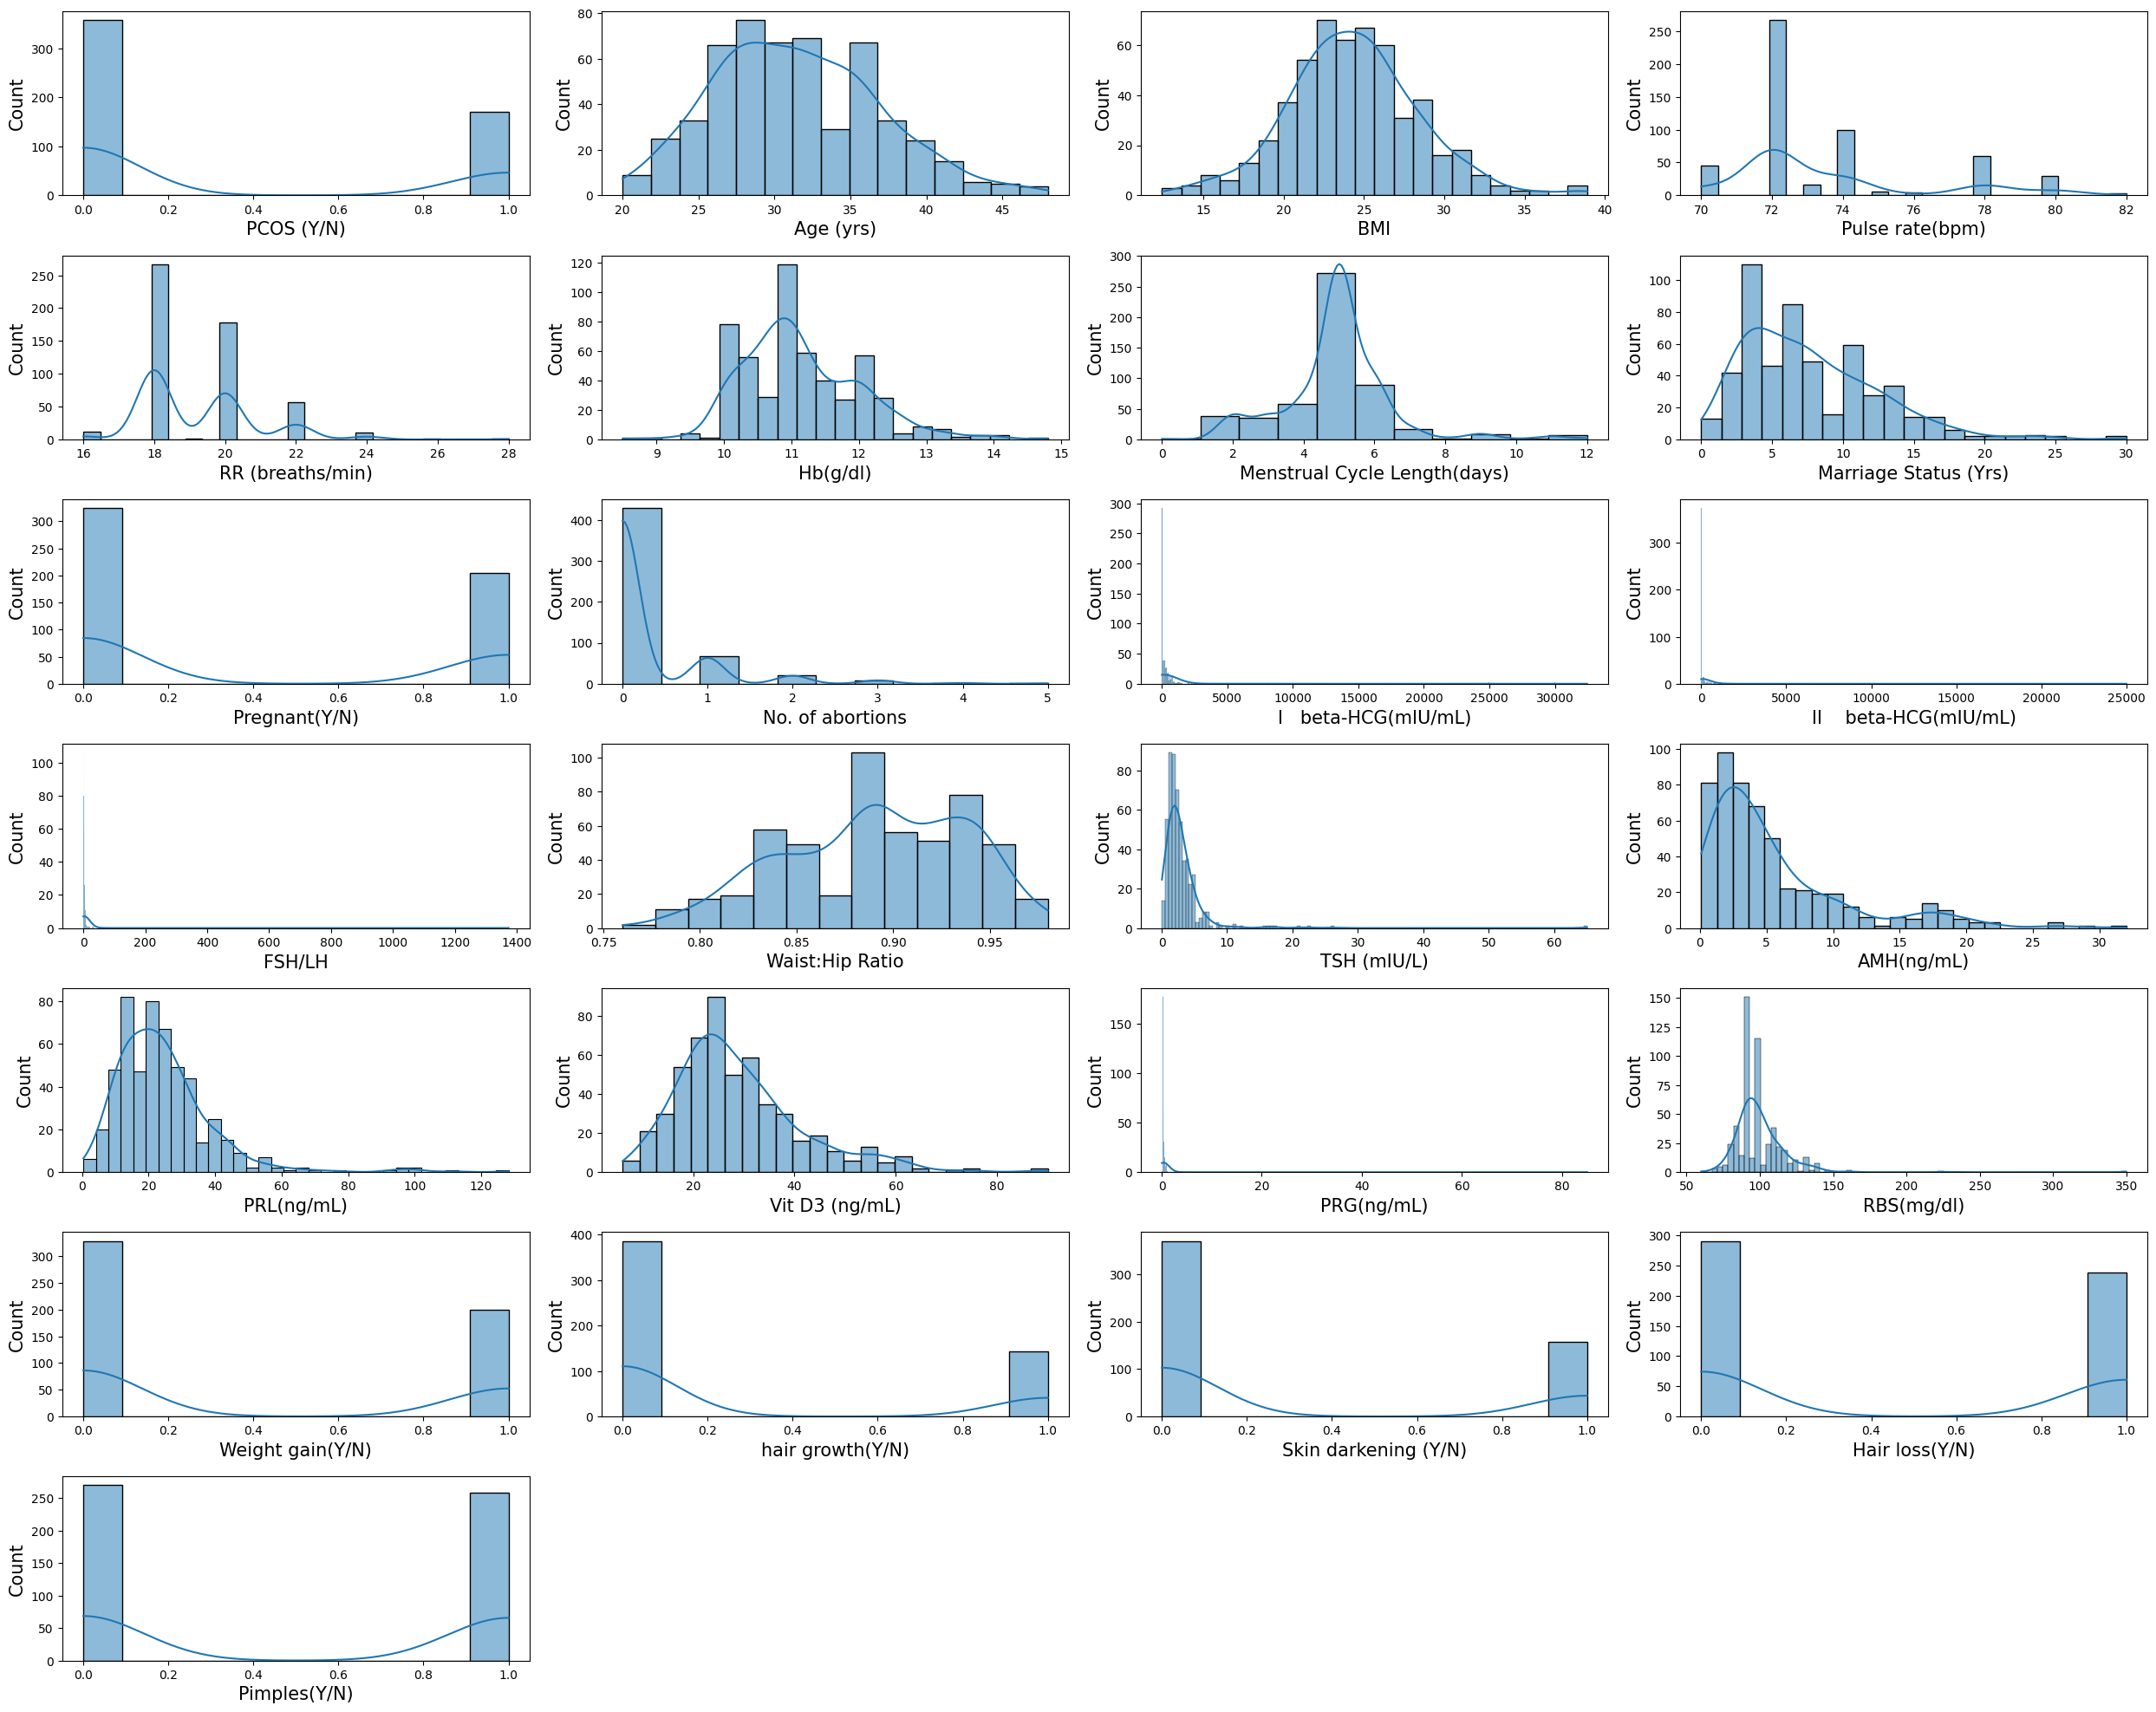

In [ ]:
plt.figure(figsize=(25, 25))
plot_num = 1
num_cols = min(len(df.columns), 25)  # Ensure we don't exceed the number of columns in df
rows = (num_cols - 1) // 3 + 1 

for col in df.columns:
    if plot_num <= num_cols:
        plt.subplot(rows, 4, plot_num)  # Adjust the subplot layout dynamically
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize=15)
        plt.ylabel('Count', fontsize=15)  # Assuming ylabel is 'Count' for all
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plot_num += 1

plt.tight_layout()
plt.show()

# Converting columns into categorical variables

## Using cleaned.csv

In [ ]:
cat_df = df.copy()

In [ ]:
cat_df.head()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0,28,19.3,78,22,10.48,5,7.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,36,24.9,74,20,11.70,5,11.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,33,25.3,72,18,11.80,5,10.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,37,29.7,72,20,12.00,5,4.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,25,20.1,72,18,10.00,5,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
cat_df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)',
       'Hb(g/dl)', 'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+',
       'Blood Group_AB-', 'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+',
       'Blood Group_O-', 'Menstrual Cycle(R/I)_irregular',
       'Menstrual Cycle(R/I)_regular'],
      dtype='object')

In [ ]:
# Possible derived variables
cat_df['Symptoms score'] = cat_df[['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)']].sum(axis=1)

temp_df = cat_df.copy()
temp_df['Reg.Exercise(Y/N)'] = temp_df['Reg.Exercise(Y/N)'].map({1: 0, 0: 1})
cat_df['Unhealthy living score'] = temp_df[['Reg.Exercise(Y/N)','Fast food (Y/N)']].sum(axis=1)

In [ ]:
# Hb(g/dl)
cat_df["Hb(g/dl)"] = cat_df.apply(lambda row: ("low" if row["Hb(g/dl)"] < 12 else "normal" if row["Hb(g/dl)"] <= 16 else "high") if row["Pregnant(Y/N)"] == 0 else ("low" if row["Hb(g/dl)"] < 11 else "normal" if row["Hb(g/dl)"] <= 14 else "high"), axis=1)

# TSH (mIU/L)
cat_df["TSH (mIU/L)"] = cat_df["TSH (mIU/L)"].apply(lambda x: "low" if x < 0.4 else "normal" if x <= 4 else "high")

# AMH(ng/mL)
cat_df["AMH(ng/mL)"] = cat_df["AMH(ng/mL)"].apply(lambda x: "low" if x < 1 else "normal" if x <= 3 else "high")

# PRL(ng/mL)
cat_df["PRL(ng/mL)"] = cat_df.apply(lambda row: ("normal" if row["PRL(ng/mL)"] < 25 else "high") if row["Pregnant(Y/N)"] == 0 else ("low" if row["PRL(ng/mL)"] < 80 else "normal" if row["PRL(ng/mL)"] <= 400 else "high"), axis=1)

# Vit D3 (ng/mL)
cat_df["Vit D3 (ng/mL)"] = cat_df["Vit D3 (ng/mL)"].apply(lambda x: "low" if x < 20 else "normal" if x <= 50 else "high")

In [ ]:
# RR (breaths/min)
cat_df["RR (breaths/min)"] = cat_df["RR (breaths/min)"].apply(lambda x: "low" if x < 12 else "normal" if x <= 20 else "high")

# I   beta-HCG(mIU/mL)
cat_df["I beta-HCG cat"] = cat_df.apply(lambda row: ("normal" if row["I   beta-HCG(mIU/mL)"]<5 else "abnormal") if row["Pregnant(Y/N)"]==0 else ("abnormal" if row["I   beta-HCG(mIU/mL)"]<5 else "normal"), axis=1)

# II    beta-HCG(mIU/mL)
cat_df["II beta-HCG cat"] = cat_df.apply(lambda row: ("normal" if row["II    beta-HCG(mIU/mL)"]<5 else "abnormal") if row["Pregnant(Y/N)"]==0 else ("abnormal" if row["II    beta-HCG(mIU/mL)"]<5 else "normal"), axis=1)

# FSH(mIU/mL)
# Assuming that all the females have puberty already and have yet to reach menopause, based on their ages.
# Their normal levels should be 4.7 to 21.5 mIU/mL.
# cat_df["FSH(mIU/mL)"] = cat_df["FSH(mIU/mL)"].apply(lambda x: "low" if x < 4.7 else "normal" if x <= 21.5 else "high")


In [ ]:
# 'PRG(ng/mL)' progesterone
cat_df["PRG(ng/mL)"] = cat_df.apply(lambda row: (
    # Non-pregnant: use luteal-phase range as the benchmark
    "low" if row["PRG(ng/mL)"] < 2 else "normal" if row["PRG(ng/mL)"] <= 25 else "high"
) if row["Pregnant(Y/N)"] == 0 else (
    "low" if row["PRG(ng/mL)"] < 10 
    else "normal" if row["PRG(ng/mL)"] <= 290
    # Pregnant: approximate categorization by trimester???
    # else "first_trimester" if row["PRG(ng/mL)"] <= 44 
    # else "second_trimester" if row["PRG(ng/mL)"] <= 82.5 
    # else "third_trimester" if row["PRG(ng/mL)"] <= 290 
    else "high"
), axis=1)

# 'RBS(mg/dl)'
cat_df["RBS(mg/dl)"] = cat_df["RBS(mg/dl)"].apply(lambda x: "low" if x < 70 else "normal" if x < 140 else "high")
# pre-diabetes: 140-199
# diabetes >200

# 'BP _Systolic (mmHg)'
cat_df["BP _Systolic (mmHg)"] = cat_df["BP _Systolic (mmHg)"].apply(lambda x: "low" if x < 90 else "normal" if x <= 139 else "high")

# 'BP _Diastolic (mmHg)’
cat_df["BP _Diastolic (mmHg)"] = cat_df["BP _Diastolic (mmHg)"].apply(lambda x: "low" if x < 60 else "normal" if x <= 89 else "high")

# 'Endometrium (mm)'
# This one really depends on the phase of the menstrual cycle?
# cat_df["Endometrium (mm)"] = cat_df["Endometrium (mm)"].apply(lambda x: "thin" if x < 5 else "normal" if x <= 16 else "thick")


In [ ]:
# One-Hot Encoding of categorical columns
cat_cols = list(cat_df.select_dtypes(exclude=np.number).columns)
cat_cols

['RR (breaths/min)',
 'Hb(g/dl)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'I beta-HCG cat',
 'II beta-HCG cat']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(cat_df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
final_df= pd.concat([cat_df.drop(cat_cols, axis=1), one_hot_df], axis=1)
final_df.head()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,RBS(mg/dl)_low,RBS(mg/dl)_normal,BP _Systolic (mmHg)_high,BP _Systolic (mmHg)_normal,BP _Diastolic (mmHg)_high,BP _Diastolic (mmHg)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,0,28,19.3,78,5,7.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,36,24.9,74,5,11.0,1,0,60.80,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,33,25.3,72,5,10.0,1,0,494.08,494.08,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,37,29.7,72,5,4.0,0,0,1.99,1.99,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0,25,20.1,72,5,1.0,1,0,801.45,801.45,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
final_df.to_csv("final_data.csv", header=True, index=False)

## Using tabtransformer_input.csv

In [ ]:
data = pd.read_csv("./tt_data/tabtransformer_input.csv")
df = data.copy()
df

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,19.3,O+,78,22,10.48,regular,5,7.0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,24.9,O+,74,20,11.70,regular,5,11.0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,25.3,A+,72,18,11.80,regular,5,10.0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,29.7,B+,72,20,12.00,regular,5,4.0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,20.1,A+,72,18,10.00,regular,5,1.0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,35,18.5,AB+,72,16,11.00,regular,5,8.0,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
525,0,30,25.3,O+,72,18,10.80,regular,5,4.0,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
526,0,36,23.4,B+,74,20,10.80,regular,6,8.0,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
527,0,27,22.2,O+,74,20,12.00,irregular,2,2.0,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
cat_df = df.copy()
cat_df.head()

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,19.3,O+,78,22,10.48,regular,5,7.0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,24.9,O+,74,20,11.70,regular,5,11.0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,25.3,A+,72,18,11.80,regular,5,10.0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,29.7,B+,72,20,12.00,regular,5,4.0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,20.1,A+,72,18,10.00,regular,5,1.0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Possible derived variables
cat_df['Symptoms score'] = cat_df[['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)']].sum(axis=1)

temp_df = cat_df.copy()
temp_df['Reg.Exercise(Y/N)'] = temp_df['Reg.Exercise(Y/N)'].map({1: 0, 0: 1})
cat_df['Unhealthy living score'] = temp_df[['Reg.Exercise(Y/N)','Fast food (Y/N)']].sum(axis=1)

In [ ]:
# Hb(g/dl)
cat_df["Hb(g/dl)"] = cat_df.apply(lambda row: ("low" if row["Hb(g/dl)"] < 12 else "normal" if row["Hb(g/dl)"] <= 16 else "high") if row["Pregnant(Y/N)"] == 0 else ("low" if row["Hb(g/dl)"] < 11 else "normal" if row["Hb(g/dl)"] <= 14 else "high"), axis=1)

# TSH (mIU/L)
cat_df["TSH (mIU/L)"] = cat_df["TSH (mIU/L)"].apply(lambda x: "low" if x < 0.4 else "normal" if x <= 4 else "high")

# AMH(ng/mL)
cat_df["AMH(ng/mL)"] = cat_df["AMH(ng/mL)"].apply(lambda x: "low" if x < 1 else "normal" if x <= 3 else "high")

# PRL(ng/mL)
cat_df["PRL(ng/mL)"] = cat_df.apply(lambda row: ("normal" if row["PRL(ng/mL)"] < 25 else "high") if row["Pregnant(Y/N)"] == 0 else ("low" if row["PRL(ng/mL)"] < 80 else "normal" if row["PRL(ng/mL)"] <= 400 else "high"), axis=1)

# Vit D3 (ng/mL)
cat_df["Vit D3 (ng/mL)"] = cat_df["Vit D3 (ng/mL)"].apply(lambda x: "low" if x < 20 else "normal" if x <= 50 else "high")

In [ ]:
# RR (breaths/min)
cat_df["RR (breaths/min)"] = cat_df["RR (breaths/min)"].apply(lambda x: "low" if x < 12 else "normal" if x <= 20 else "high")

# I   beta-HCG(mIU/mL)
cat_df["I beta-HCG cat"] = cat_df.apply(lambda row: ("normal" if row["I   beta-HCG(mIU/mL)"]<5 else "abnormal") if row["Pregnant(Y/N)"]==0 else ("abnormal" if row["I   beta-HCG(mIU/mL)"]<5 else "normal"), axis=1)

# II    beta-HCG(mIU/mL)
cat_df["II beta-HCG cat"] = cat_df.apply(lambda row: ("normal" if row["II    beta-HCG(mIU/mL)"]<5 else "abnormal") if row["Pregnant(Y/N)"]==0 else ("abnormal" if row["II    beta-HCG(mIU/mL)"]<5 else "normal"), axis=1)

# FSH(mIU/mL)
# Assuming that all the females have puberty already and have yet to reach menopause, based on their ages.
# Their normal levels should be 4.7 to 21.5 mIU/mL.
# cat_df["FSH(mIU/mL)"] = cat_df["FSH(mIU/mL)"].apply(lambda x: "low" if x < 4.7 else "normal" if x <= 21.5 else "high")


In [ ]:
# 'PRG(ng/mL)' progesterone
cat_df["PRG(ng/mL)"] = cat_df.apply(lambda row: (
    # Non-pregnant: use luteal-phase range as the benchmark
    "low" if row["PRG(ng/mL)"] < 2 else "normal" if row["PRG(ng/mL)"] <= 25 else "high"
) if row["Pregnant(Y/N)"] == 0 else (
    "low" if row["PRG(ng/mL)"] < 10 
    else "normal" if row["PRG(ng/mL)"] <= 290
    # Pregnant: approximate categorization by trimester???
    # else "first_trimester" if row["PRG(ng/mL)"] <= 44 
    # else "second_trimester" if row["PRG(ng/mL)"] <= 82.5 
    # else "third_trimester" if row["PRG(ng/mL)"] <= 290 
    else "high"
), axis=1)

# 'RBS(mg/dl)'
cat_df["RBS(mg/dl)"] = cat_df["RBS(mg/dl)"].apply(lambda x: "low" if x < 70 else "normal" if x < 140 else "high")
# pre-diabetes: 140-199
# diabetes >200

# 'BP _Systolic (mmHg)'
cat_df["BP _Systolic (mmHg)"] = cat_df["BP _Systolic (mmHg)"].apply(lambda x: "low" if x < 90 else "normal" if x <= 139 else "high")

# 'BP _Diastolic (mmHg)’
cat_df["BP _Diastolic (mmHg)"] = cat_df["BP _Diastolic (mmHg)"].apply(lambda x: "low" if x < 60 else "normal" if x <= 89 else "high")

# 'Endometrium (mm)'
# This one really depends on the phase of the menstrual cycle?
# cat_df["Endometrium (mm)"] = cat_df["Endometrium (mm)"].apply(lambda x: "thin" if x < 5 else "normal" if x <= 16 else "thick")


In [ ]:
# Saving the pandas dataframe
cat_df.to_csv("./tt_data/tabtransformer_input_final.csv", index=False, header=True)

In [ ]:
# Reading in the tabtransformer_input_final.csv
pd.read_csv("./tt_data/tabtransformer_input_final.csv")

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Marriage Status (Yrs),...,BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Symptoms score,Unhealthy living score,I beta-HCG cat,II beta-HCG cat
0,0,28,19.3,O+,78,high,low,regular,5,7.0,...,normal,3,3,18.0,18.0,8.5,0,2.0,normal,normal
1,0,36,24.9,O+,74,normal,normal,regular,5,11.0,...,normal,3,5,15.0,14.0,3.7,0,1.0,normal,abnormal
2,1,33,25.3,A+,72,normal,normal,regular,5,10.0,...,normal,13,15,18.0,20.0,10.0,2,2.0,normal,normal
3,0,37,29.7,B+,72,normal,normal,regular,5,4.0,...,normal,2,2,15.0,14.0,7.5,0,1.0,normal,normal
4,0,25,20.1,A+,72,normal,low,regular,5,1.0,...,normal,3,4,16.0,14.0,7.0,1,1.0,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,35,18.5,AB+,72,normal,low,regular,5,8.0,...,normal,1,0,17.5,10.0,6.7,0,1.0,normal,normal
525,0,30,25.3,O+,72,normal,low,regular,5,4.0,...,normal,9,7,19.0,18.0,8.2,1,1.0,normal,abnormal
526,0,36,23.4,B+,74,normal,low,regular,6,8.0,...,normal,1,0,18.0,9.0,7.3,0,1.0,normal,normal
527,0,27,22.2,O+,74,normal,normal,irregular,2,2.0,...,normal,7,6,18.0,16.0,11.5,1,1.0,abnormal,normal
